Here, I will show some visualizations on the points of the wine and regression prediction on it (>= 90, < 90). 

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import string

In [2]:
from google.colab import files
reviews = files.upload()

Saving winemag-data_first150k.csv to winemag-data_first150k.csv


In [81]:
wineData = pd.read_csv("winemag-data_first150k.csv")
wineData.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [82]:
wineData['points'].describe()
# sns.distplot(wineData['points'], kde=False, rug=True)

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [0]:
wineData = wineData.dropna(subset=['points', 'price'])
from sklearn.model_selection import train_test_split

train, test = train_test_split(wineData, test_size=0.1, random_state=42)

In [84]:
# create target label that shows two categories: 'at or above 90' and 'below 90'
def goodness(i):
  if i < 88:
    return 'below 88'
  else:
    return 'at or above 88'
train['good?'] = train['points'].apply(goodness)
valid['good?'] = valid['points'].apply(goodness)
test['good?'] = test['points'].apply(goodness)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
# train dataset
# average points per province
pts_province = pd.DataFrame(train.groupby('province')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_province'})
# average points per region 1 
pts_region_1 = pd.DataFrame(train.groupby('region_1')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_1'})
# average points per region 2
pts_region_2 = pd.DataFrame(train.groupby('region_2')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_2'})
# average points per variety
pts_variety = pd.DataFrame(train.groupby('variety')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_variety'})
# length of description
train['len_description'] = train['description'].str.len()


train = pd.merge(train, pts_province, on='province')
train = pd.merge(train, pts_region_1, on='region_1')
train = pd.merge(train, pts_region_2, on='region_2')
train = pd.merge(train, pts_variety, on='variety')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
# validation dataset
# average points per province
pts_province = pd.DataFrame(valid.groupby('province')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_province'})
# average points per region 1 
pts_region_1 = pd.DataFrame(valid.groupby('region_1')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_1'})
# average points per region 2
pts_region_2 = pd.DataFrame(valid.groupby('region_2')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_2'})
# average points per variety
pts_variety = pd.DataFrame(valid.groupby('variety')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_variety'})
# length of description
valid['len_description'] = valid['description'].str.len()

valid = pd.merge(valid, pts_province, on='province')
valid = pd.merge(valid, pts_region_1, on='region_1')
valid = pd.merge(valid, pts_region_2, on='region_2')
valid = pd.merge(valid, pts_variety, on='variety')

In [87]:
# test dataset
# average points per province
pts_province = pd.DataFrame(test.groupby('province')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_province'})
# average points per region 1 
pts_region_1 = pd.DataFrame(test.groupby('region_1')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_1'})
# average points per region 2
pts_region_2 = pd.DataFrame(test.groupby('region_2')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_region_2'})
# average points per variety
pts_variety = pd.DataFrame(test.groupby('variety')['points'].mean()).sort_values(by=['points'], ascending = False).reset_index().rename(columns={'points': 'pts_variety'})
# length of description
test['len_description'] = test['description'].str.len()

test = pd.merge(test, pts_province, on='province')
test = pd.merge(test, pts_region_1, on='region_1')
test = pd.merge(test, pts_region_2, on='region_2')
test = pd.merge(test, pts_variety, on='variety')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [88]:
wineData['province'].value_counts()
wineData['price'].describe()
# wineData['points'].describe()
# wineData['points'].value_counts()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

[(80, 100), (0, 500)]

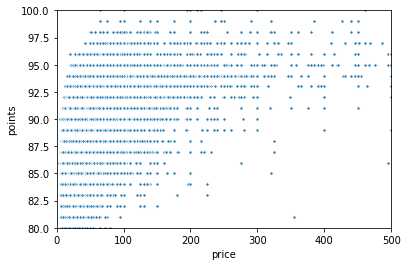

In [89]:
ax = sns.scatterplot(x="price", y="points", data=wineData, s=10)
ax.set(xlim=(0, 500), ylim=(80, 100))

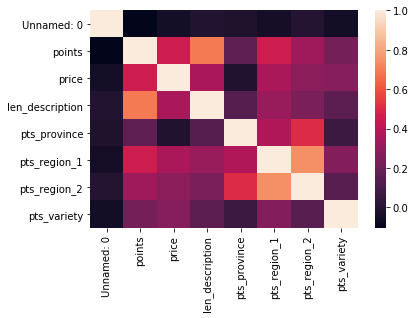

In [90]:
corr = train.corr()
 
# Heatmap
sns.heatmap(corr)

(-0.5, 399.5, 199.5, -0.5)

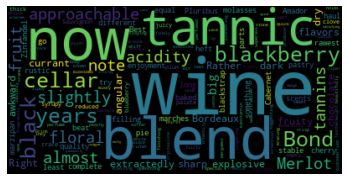

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

above_88 = train[train['good?'] == 'at or above 88']
below_88 = train[train['good?'] == 'below 88']

# for at or above 88
text = above_88.description.values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

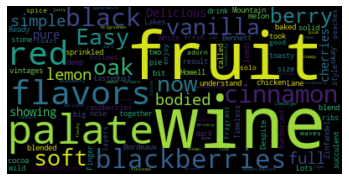

In [92]:
# for below 90
text = below_88.description.values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [0]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.zeros((len(texts), len(words)))
    for row_index in range(len(texts)):
        for col_index in range(len(words)):
            if words[col_index] in texts[row_index]:
                indicator_array[row_index, col_index] = 1
    return indicator_array

In [0]:
words = ['opulent', 'fabulous', 'impressive', 'beautiful', 'umami', 'tremendous', 'exotic', 'complex', 'perfect', 'valuable', 
'dazzle', 'silk', 'outstanding', 'magnificent', 'gorgeous', 'powerful', 'magnificent' , 'wonderful', 'exceptional', 'glorious',
 'impeccable', 'enjoyable', 'elegant', 'mouthfeel', 'profound', 'seduce', 'seamless', 'concentrated']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [96]:
# create X_train
f1 = (words_in_texts(words, train['description']).astype(int))
f2 = np.array([(train['pts_province'] - np.min(train['pts_province']))/np.ptp(train['pts_province'])]).transpose()
f3 = np.array([(train['pts_region_1'] - np.min(train['pts_region_1']))/np.ptp(train['pts_region_1'])]).transpose()
f4 = np.array([(train['pts_region_2'] - np.min(train['pts_region_2']))/np.ptp(train['pts_region_2'])]).transpose()
f5 = np.array([(train['pts_variety'] - np.min(train['pts_variety']))/np.ptp(train['pts_variety'])]).transpose()
f6 = np.array([(train['price'] - np.min(train['price']))/np.ptp(train['price'])]).transpose()

X_train = np.concatenate((f2, f3, f5, f6), axis=1)
Y_train = train['good?']

model.fit(X = X_train, y= Y_train)
training_accuracy = accuracy_score(Y_train, model.predict(X_train))
print("Training Accuracy: ", training_accuracy)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy:  0.6858980231215991


In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, cv=5)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.67408629, 0.69613412, 0.7128985 , 0.6483144 , 0.66031513])

In [0]:
name = ['pts_province', 'pts_region_1', 'pts_region_2', 'pts_variety', 'price']

In [39]:
model.coef_[0]
print('Logistic Regression (L2) feature Importance:')
for k,v in sorted(zip(map(lambda x:round(x,4), model.coef_[0]),name),reverse=True) :
    print(v + ': ' + str(k))

Logistic Regression (L2) feature Importance:
pts_region_2: 0.0749
pts_province: -1.0214
pts_variety: -1.6913
pts_region_1: -4.7709
price: -30.2073


In [100]:
# create X_test
f1 = (words_in_texts(words, test['description']).astype(int))
f2 = np.array([(test['pts_province'] - np.min(test['pts_province']))/np.ptp(test['pts_province'])]).transpose()
f3 = np.array([(test['pts_region_1'] - np.min(test['pts_region_1']))/np.ptp(test['pts_region_1'])]).transpose()
f4 = np.array([(test['pts_region_2'] - np.min(test['pts_region_2']))/np.ptp(test['pts_region_2'])]).transpose()
f5 = np.array([(test['pts_variety'] - np.min(test['pts_variety']))/np.ptp(test['pts_variety'])]).transpose()
f6 = np.array([(test['price'] - np.min(test['price']))/np.ptp(test['price'])]).transpose()

X_test = np.concatenate((f2, f3, f5, f6), axis=1)
Y_test = test['good?'] 
print("Test Accuracy: ", accuracy_score(Y_test, model.predict(X_test)))

Test Accuracy:  0.6248570961946758


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

clf.fit(X_train,Y_train)

print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))

print('Accuracy on test---')
y_pred_test=clf.predict(X_test)
print(accuracy_score(Y_test,y_pred_test))


Iteration 1, loss = 0.69669101
Iteration 2, loss = 0.68767898
Iteration 3, loss = 0.68404065
Iteration 4, loss = 0.68027422
Iteration 5, loss = 0.67573464
Iteration 6, loss = 0.67032366
Iteration 7, loss = 0.66380242
Iteration 8, loss = 0.65604722
Iteration 9, loss = 0.64738098
Iteration 10, loss = 0.63779317
Iteration 11, loss = 0.62910775
Iteration 12, loss = 0.62214005
Iteration 13, loss = 0.61702351
Iteration 14, loss = 0.61342046
Iteration 15, loss = 0.61140932
Iteration 16, loss = 0.61016445
Iteration 17, loss = 0.60948740
Iteration 18, loss = 0.60892835
Iteration 19, loss = 0.60856693
Iteration 20, loss = 0.60822506
Iteration 21, loss = 0.60801425
Iteration 22, loss = 0.60786629
Iteration 23, loss = 0.60757845
Iteration 24, loss = 0.60749917
Iteration 25, loss = 0.60731732
Iteration 26, loss = 0.60724947
Iteration 27, loss = 0.60701177
Iteration 28, loss = 0.60687256
Iteration 29, loss = 0.60677277
Iteration 30, loss = 0.60658938
Iteration 31, loss = 0.60644492
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6793206427144978
Accuracy on test---
0.6549077249714192
